Visualizierung von Ergebnissen und Erstellung von Bildern zum Präsentieren

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import datetime
import numpy as np
import os
import glob
from shapely import geometry
import matplotlib.pyplot as plt
import ast
from shapely.geometry import Polygon

In [3]:
df = pd.read_csv("D:/Visual_3D_Position/visual_3d_git_project/teamblue/data/results/extended/Locations_00_extended.csv")
df.head()

,idx_prediction,week_num,day,day_new,hour,minute,x_actual,y_actual,z_actual,room_actual,x_prediction,y_prediction,z_prediction,room_prediction
0,1218,43.0,216,Tue,9,24,-28.863052,-8.933346,-35.465336,4C-05,-29.402145,1.545332,-30.374396,5C-02.1
1,1219,43.0,216,Tue,10,20,-33.010000,1.566655,-32.870000,5C-02.1,-32.794563,1.572175,-32.757655,5C-02.1
2,1220,43.0,216,Tue,10,40,-32.046840,1.566655,-31.636177,5C-02.1,-31.620808,1.572463,-10.043077,Treppenhaus 5. OG
3,1221,43.0,216,Tue,11,35,-32.860810,1.566655,-32.758038,5C-02.1,-32.677000,1.570444,-32.647576,5C-02.1
4,1222,43.0,216,Tue,12,13,-14.859993,1.566655,-3.299982,Küche 5. OG,-15.273438,1.571311,-9.207754,Vorraum 5C-15


In [7]:
raeume_df = pd.read_csv("../data/preprocessed/Raumkoordinaten/raumkoordinaten_prep_unity.csv", index_col = 0)

vier_c = raeume_df.loc[raeume_df["floor"].isin([0])]
fuenf_c = raeume_df.loc[raeume_df["floor"].isin([1])]

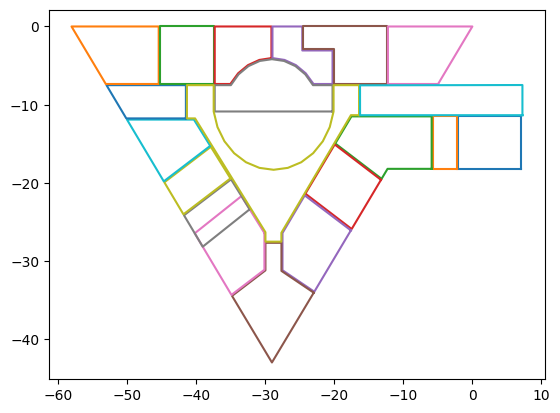

In [6]:
for s, coor in enumerate(vier_c["coor"]):
    room = Polygon(ast.literal_eval(coor))
    plt.plot(*room.exterior.xy)

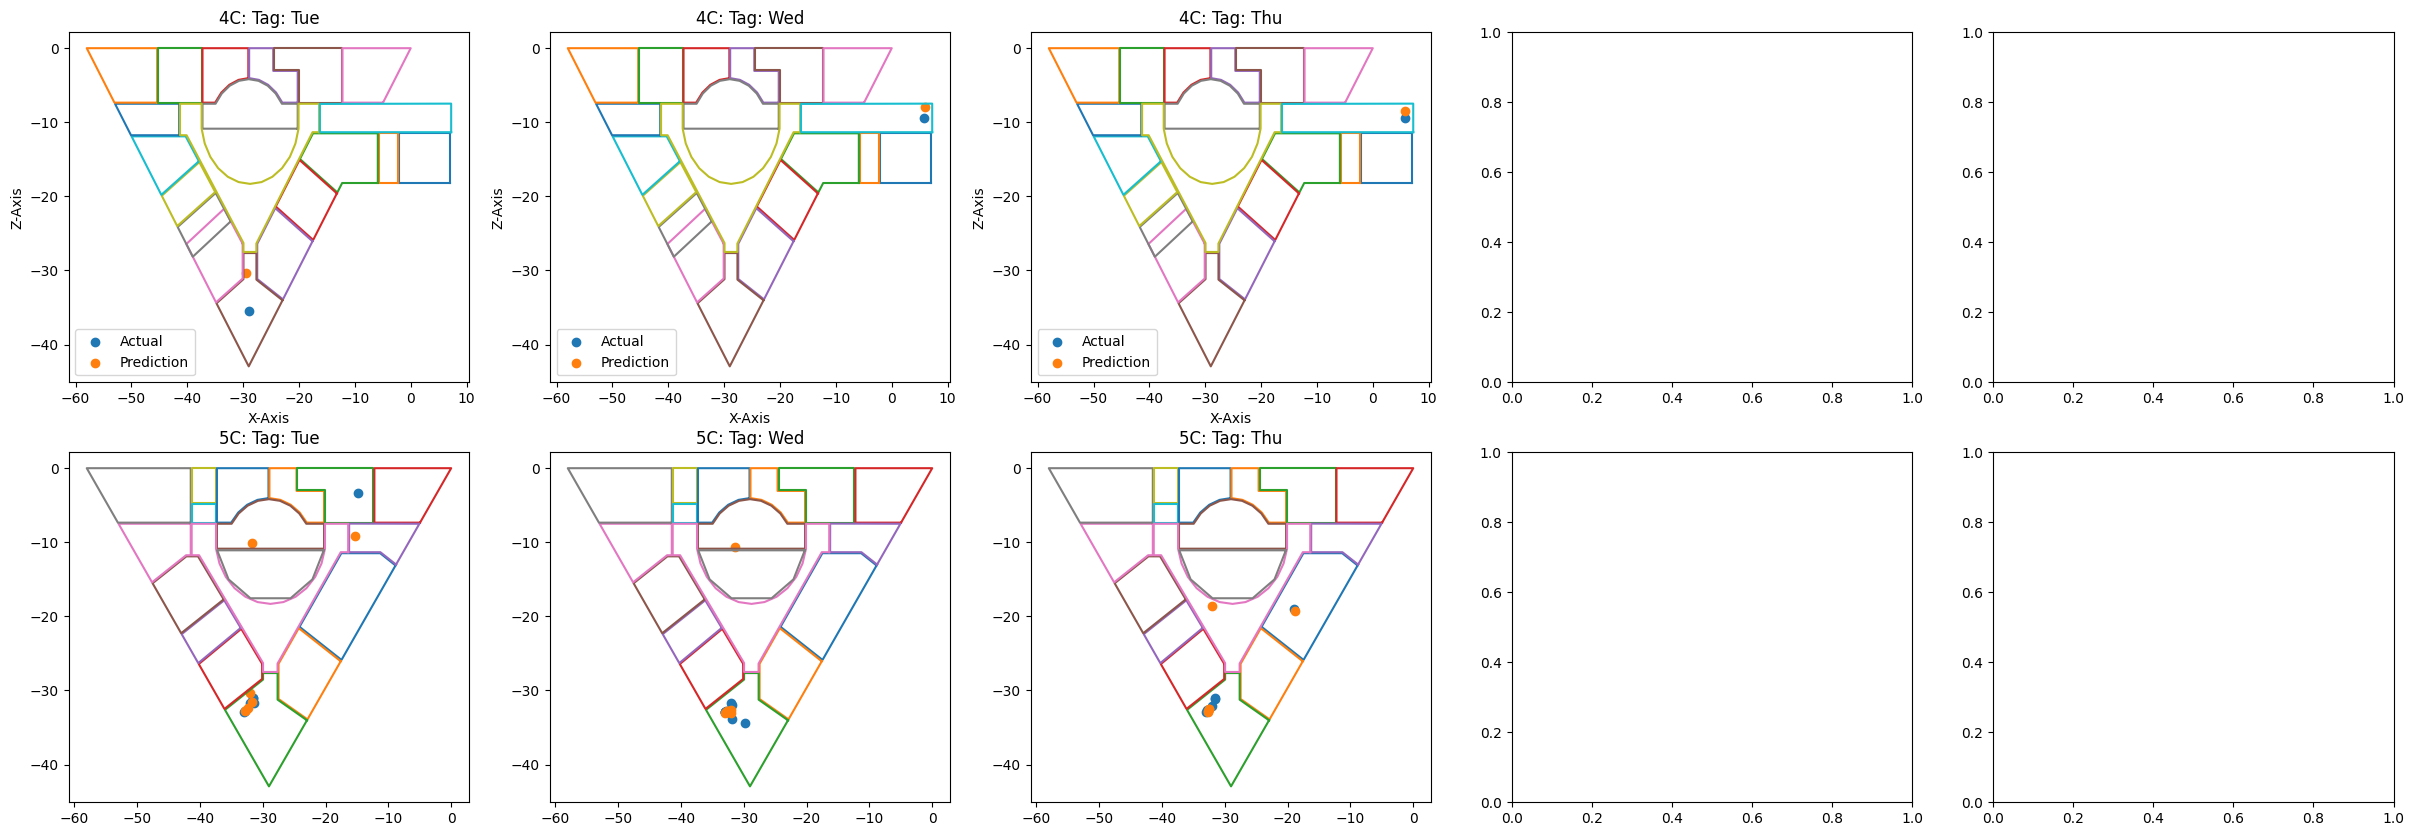

In [37]:
df = pd.read_csv("D:/Visual_3D_Position/visual_3d_git_project/teamblue/data/results/extended/Locations_00_extended.csv")

df["y_binary"] = ""
unique_day = df["day_new"].unique()


fig, axes = plt.subplots(2, 5, figsize=(30, 10))

for i, day in enumerate(unique_day):
    df_plot = df.loc[df["day_new"] == day]
    #df_plot = df_plot.loc[df["no_movement_15min"] == 1]
    #df_plot = df_plot.loc[row_indexer,col_indexer] = value instead
    
    df_plot.loc[(df_plot["y_actual"] >= -1) & (df_plot["y_actual"] <= 3), "y_binary"] = 1
    df_plot.loc[(df_plot["y_actual"] >= -12) & (df_plot["y_actual"] <= -1), "y_binary"] = 0
    df_plot_down = df_plot.loc[df_plot["y_binary"].isin([0])]
    x_down = df_plot_down["x_actual"]
    z_down = df_plot_down["z_actual"]
    axes[0][i].scatter(x_down, z_down, label="Actual")

    x_pred_down = df_plot_down["x_prediction"]
    z_pred_down = df_plot_down["z_prediction"]
    axes[0][i].scatter(x_pred_down, z_pred_down, label="Prediction")
    axes[0][i].set_title(f"4C: Tag: {day}")
    
    for s, coor in enumerate(vier_c["coor"]):
        room = Polygon(ast.literal_eval(coor))
        axes[0][i].plot(*room.exterior.xy)

    axes[0][i].set_xlabel("X-Axis")
    axes[0][i].set_ylabel("Z-Axis")
    
    legend = axes[0][i].legend()
    



    df_plot_up = df_plot.loc[df_plot["y_binary"].isin([1])]
    x = df_plot_up["x_actual"]
    z = df_plot_up["z_actual"]
    axes[1][i].scatter(x, z)

    x_pred = df_plot_up["x_prediction"]
    z_pred = df_plot_up["z_prediction"]
    axes[1][i].scatter(x_pred, z_pred)
    axes[1][i].set_title(f"5C: Tag: {day}")

    for s, coor in enumerate(fuenf_c["coor"]):
        room = Polygon(ast.literal_eval(coor))
        axes[1][i].plot(*room.exterior.xy)
        

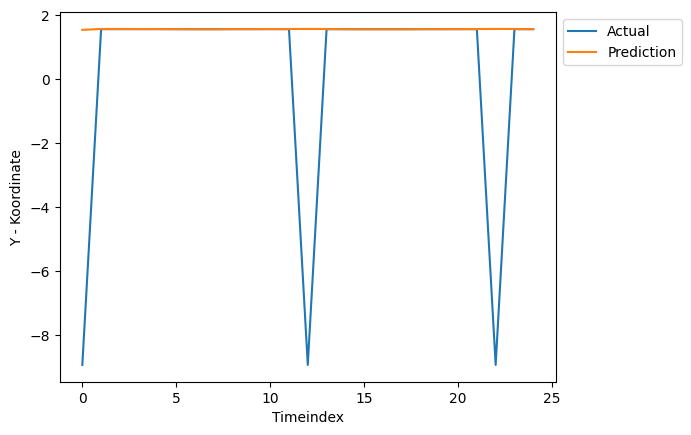

In [31]:
df = pd.read_csv("D:/Visual_3D_Position/visual_3d_git_project/teamblue/data/results/extended/Locations_00_extended.csv")
y_actual = df["y_actual"]
y_prediction = df["y_prediction"]
x_time = df.index

plt.plot(x_time, y_actual, label='Actual')
plt.plot(x_time, y_prediction, label='Prediction')
plt.xlabel("Timeindex")
plt.ylabel("Y - Koordinate")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [ ]:
df = pd.read_csv("data/results/extended/Locations_00_extended.csv")
y_actual = df["y_actual"]
y_prediction = df["y_prediction"]
x_time = df.index

plt.plot(x_time, y_actual)
plt.plot(x_time, y_prediction, label='prediction')
plt.xlabel("Timesteps")
plt.ylabel("Y - Variable")
plt.legend('best')
plt.show()

In [65]:
summary = pd.read_csv("../data/results/summary_v3.csv")
summary.head()

,person,x_MAE,x_MSE,x_RMSE,y_MAE,y_MSE,y_RMSE,z_MAE,z_MSE,z_RMSE,accuracy
0,Locations_00,0.44,0.32,0.56,0.44,0.32,0.56,0.44,0.32,0.56,72.00
1,Locations_01,0.84,4.73,2.17,0.84,4.73,2.17,0.84,4.73,2.17,88.64
2,Locations_02,0.81,4.34,2.08,0.81,4.34,2.08,0.81,4.34,2.08,80.00
3,Locations_03,2.40,40.32,6.35,2.40,40.32,6.35,2.40,40.32,6.35,73.33
4,Locations_04,3.92,109.98,10.49,3.92,109.98,10.49,3.92,109.98,10.49,75.00


In [77]:
summary_pv = summary[["person", "accuracy"]]
summary_pv.head()
summary_pv = summary_pv.dropna()
summary_pv = summary_pv.drop_duplicates(subset='person')
pivoted_df = summary_pv.pivot(columns='person', values='accuracy')
pivoted_df.head()

person,Locations_00,Locations_01,Locations_02,Locations_03,Locations_04,Locations_05,Locations_06,Locations_07,Locations_08,Locations_09,...,Locations_11,Locations_12,Locations_13,Locations_14,Locations_15,Locations_16,Locations_17,Locations_18,Locations_19,Locations_20
0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,88.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,73.33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Configuration TimeSeriesDataSet
person = "Locations_00_prep_v2_tft"
#person = person
input_df = pd.read_csv('../data/preprocessed/TFT_DataSets/' + person + ".csv")
input_df
#input_df = input_df.loc[input_df["week_num"] < 44]
input_df = input_df.loc[input_df["no_movement_15min"].isin([1])]
#input_df = input_df.loc[input_df["coordinate"] > 0]
input_df["idx"] = range(len(input_df))
week_43_length =  input_df.loc[input_df["week_num"] == 43]
week_43_length =  week_43_length.loc[week_43_length["coordinate_var"] == "x"]
week_43_length = len(week_43_length)
week_43_length

25

C:\Users\flipj\AppData\Local\Temp\ipykernel_10876\1887377265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df["coordinate"] = y_df["coordinate"] - 10


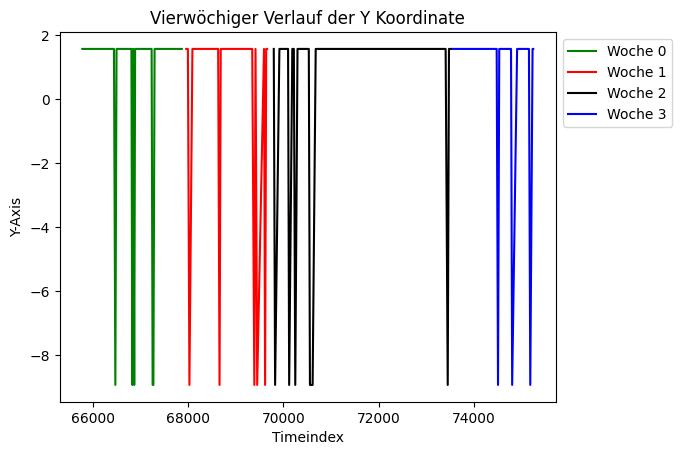

In [28]:
y_df =  input_df.loc[input_df["coordinate_var"] == "y"]
y_df["coordinate"] = y_df["coordinate"] - 10
week_length =  y_df.loc[y_df["week_num"] == 3]
len(week_length)


#y_df = y_df["coordinate"].to_list()
# Generate the index values based on the length of the lists
index = range(len(y_df))



# Plot the lists
plt.plot(y_df.index[:49], y_df['coordinate'].values[:49], color='green', label='Woche 0')
plt.plot(y_df.index[50:98], y_df['coordinate'].values[50:98], color='red', label='Woche 1')
plt.plot(y_df.index[99:148], y_df['coordinate'].values[99:148], color='black', label='Woche 2')
plt.plot(y_df.index[149:195], y_df['coordinate'].values[149:195], color='blue', label='Woche 3')

# Add labels and legend
plt.xlabel('Timeindex')
plt.ylabel('Y-Axis')
plt.title('Vierwöchiger Verlauf der Y Koordinate')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

# Show the plot
plt.show()

In [19]:
folder_path = '../data/results/extended/'

# Get a list of all the CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
print(csv_files)
for i in csv_files:
    filename = os.path.splitext(os.path.basename(i))[0]
    print(filename)

['../data/results/extended\\Locations_00_extended.csv', '../data/results/extended\\Locations_01_extended.csv', '../data/results/extended\\Locations_02_extended.csv', '../data/results/extended\\Locations_03_extended.csv', '../data/results/extended\\Locations_04_extended.csv', '../data/results/extended\\Locations_05_extended.csv', '../data/results/extended\\Locations_06_extended.csv', '../data/results/extended\\Locations_07_extended.csv', '../data/results/extended\\Locations_08_extended.csv', '../data/results/extended\\Locations_09_extended.csv', '../data/results/extended\\Locations_10_extended.csv', '../data/results/extended\\Locations_11_extended.csv', '../data/results/extended\\Locations_12_extended.csv', '../data/results/extended\\Locations_13_extended.csv', '../data/results/extended\\Locations_14_extended.csv', '../data/results/extended\\Locations_15_extended.csv', '../data/results/extended\\Locations_16_extended.csv', '../data/results/extended\\Locations_17_extended.csv', '../data/

['../data/results/extended\\Locations_00_extended.csv', '../data/results/extended\\Locations_01_extended.csv', '../data/results/extended\\Locations_02_extended.csv', '../data/results/extended\\Locations_03_extended.csv', '../data/results/extended\\Locations_04_extended.csv', '../data/results/extended\\Locations_05_extended.csv', '../data/results/extended\\Locations_06_extended.csv', '../data/results/extended\\Locations_07_extended.csv', '../data/results/extended\\Locations_08_extended.csv', '../data/results/extended\\Locations_09_extended.csv', '../data/results/extended\\Locations_10_extended.csv', '../data/results/extended\\Locations_11_extended.csv', '../data/results/extended\\Locations_12_extended.csv', '../data/results/extended\\Locations_13_extended.csv', '../data/results/extended\\Locations_14_extended.csv', '../data/results/extended\\Locations_15_extended.csv', '../data/results/extended\\Locations_16_extended.csv', '../data/results/extended\\Locations_17_extended.csv', '../data/

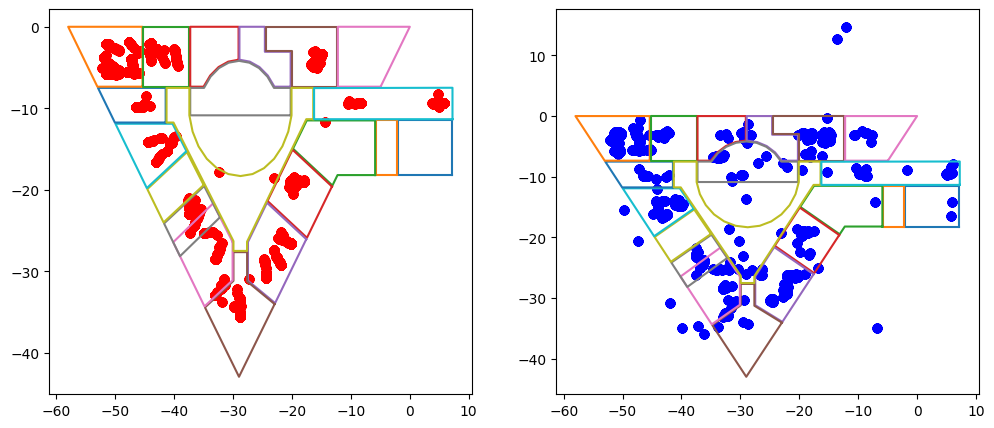

In [32]:
folder_path = '../data/results/extended/'

# Get a list of all the CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
print(csv_files)
for i in csv_files:
    filename = os.path.splitext(os.path.basename(i))[0]
    print(filename)


    df = pd.read_csv('../data/results/extended/'+filename+".csv")

    df_plot = pd.concat([df_plot, df], axis=0)

#df["y_binary"] = ""
#unique_day = df["day_new"].unique()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for s, coor in enumerate(vier_c["coor"]):
    room = Polygon(ast.literal_eval(coor))
    axes[0].plot(*room.exterior.xy)
    axes[1].plot(*room.exterior.xy)


for i, day in enumerate(unique_day):
    #df_plot = df#.loc[df["day_new"] == day]
    #df_plot = df_plot.loc[df["no_movement_15min"] == 1]
    #df_plot = df_plot.loc[row_indexer,col_indexer] = value instead
    
    
    x_down = df_plot["x_actual"]
    z_down = df_plot["z_actual"]
    axes[0].scatter(x_down, z_down, label="Actual", c="red")

    
    x_pred_down = df_plot["x_prediction"]
    z_pred_down = df_plot["z_prediction"]
    axes[1].scatter(x_pred_down, z_pred_down, label="Prediction", c="blue")


    """
    axes[0][i].set_title(f"4C: Tag: {day}")
    
    for s, coor in enumerate(vier_c["coor"]):
        room = Polygon(ast.literal_eval(coor))
        axes[0][i].plot(*room.exterior.xy)

    axes[0][i].set_xlabel("X-Axis")
    axes[0][i].set_ylabel("Z-Axis")
    
    legend = axes[0][i].legend()
    



    df_plot_up = df_plot.loc[df_plot["y_binary"].isin([1])]
    x = df_plot_up["x_actual"]
    z = df_plot_up["z_actual"]
    axes[1][i].scatter(x, z)

    x_pred = df_plot_up["x_prediction"]
    z_pred = df_plot_up["z_prediction"]
    axes[1][i].scatter(x_pred, z_pred)
    axes[1][i].set_title(f"5C: Tag: {day}")

for s, coor in enumerate(vier_c["coor"]):
    room = Polygon(ast.literal_eval(coor))
    axes[0].plot(*room.exterior.xy)
    axes[1].plot(*room.exterior.xy)"""